# Analyzing Used Car Listing on eBay Kleinanzigen

In this Project, we will analyze a Dataset that have an information about Used car and this Dataset was prepared by Dataquast. This Dataset has been processed by sampling the full 50.000 data points.

The data dictionary provided with data is as follows:
* dateCrawled - When this ad was first crawled. All field-values are taken from this date.
* name - Name of the car.
* seller - Whether the seller is private or a dealer.
* offerType - The type of listing
* price - The price on the ad to sell the car.
* abtest - Whether the listing is included in an A/B test.
* vehicleType - The vehicle Type.
* yearOfRegistration - The year in which the car was first registered.
* gearbox - The transmission type.
* powerPS - The power of the car in PS.
* model - The car model name.
* kilometer - How many kilometers the car has driven.
* monthOfRegistration - The month in which the car was first registered.
* fuelType - What type of fuel the car uses.
* brand - The brand of the car.
* notRepairedDamage - If the car has a damage which is not yet repaired.
* dateCreated - The date on which the eBay listing was created.
* nrOfPictures - The number of pictures in the ad.
* postalCode - The postal code for the location of the vehicle.
* lastSeenOnline - When the crawler saw this ad last online.

We will clean the data before we analyze it.

In [1]:
import pandas as pd
import numpy as np

In [2]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')

In [3]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We can see that the dataset has 15 column object which means has a text property and 5 column int type. Also there are several Null data under 20% of  each total.

## Clean Column

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

we will change coulmn name properly and rename some of it to get better representing name.

In [5]:
autos.columns = ['date_crawled','name','seller','offer_type','price','ab_test',
                 'vehicle_type','registration_year','gearbox','power_ps',
                 'model','odometer','registration_month','fuel_type','brand',
                 'unrepaired_damage','ad_created','num_photos','postal_code',
                 'last_seen']

In [6]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Initial Data Exploration and Cleaning

In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-12 16:06:22,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


We can notice that the values of seller and offer_type are the same, and the values of num_photos is strange because of zero value.

In [8]:
autos['num_photos'].value_counts()

0    50000
Name: num_photos, dtype: int64

it just been proved that the num_photos column just fill by zero value. Because of thath we will drop that column and also for the seller and offer_type

In [9]:
autos = autos.drop(['num_photos','seller','offer_type'],axis = 1)

In [10]:
autos['price'] = (autos['price'].str.replace("$","")
                                .str.replace(",","")
                                .astype(int)
                                 )
autos['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32

In [11]:
autos["odometer"] = (autos["odometer"]
                             .str.replace("km","")
                             .str.replace(",","")
                             .astype(int)
                             )
autos.rename({"odometer": "odometer_km"}, axis=1, inplace=True)
autos["odometer_km"].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int32

## Exploring Odometer and Price

In [12]:
autos["odometer_km"].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

As we know that the product is used car, we can see that high mileage is dominated compare to the low mileage. also the value of odometer in km is rounded.

In [13]:
print(autos["price"].unique().shape)
print(autos["price"].describe())
print(autos["price"].value_counts())

(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
0        1421
500       781
1500      734
2500      643
1000      639
         ... 
20790       1
8970        1
846         1
2895        1
33980       1
Name: price, Length: 2357, dtype: int64


Again, we can see that the price value is rounded. There are many price in total, 2357, that may the price value was input by the user and not provided by the company. We can notice there are 1421 cars that has 0 price adn we will removing that data points. The max value of the price column is a hundred millions, it's pretty strange. let's look at the higher price.

In [14]:
autos["price"].value_counts().sort_index(ascending=False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

We will remove any data points that has the value above $350,000, because it doesn't seem realistic.

In [15]:
autos = autos[autos["price"].between(1,351000)]
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

# Exploring the Date Column

In [16]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [17]:
(autos["date_crawled"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index())
        

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

In [18]:
(autos["date_crawled"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_values())

2016-04-07    0.001400
2016-04-06    0.003171
2016-03-18    0.012911
2016-04-05    0.013096
2016-03-06    0.014043
2016-03-13    0.015670
2016-03-05    0.025327
2016-03-24    0.029342
2016-03-16    0.029610
2016-03-27    0.031092
2016-03-25    0.031607
2016-03-17    0.031628
2016-03-31    0.031834
2016-03-10    0.032184
2016-03-26    0.032204
2016-03-23    0.032225
2016-03-11    0.032575
2016-03-22    0.032987
2016-03-09    0.033090
2016-03-08    0.033296
2016-03-30    0.033687
2016-04-01    0.033687
2016-03-29    0.034099
2016-03-15    0.034284
2016-03-19    0.034778
2016-03-28    0.034860
2016-04-02    0.035478
2016-03-07    0.036014
2016-04-04    0.036487
2016-03-14    0.036549
2016-03-12    0.036920
2016-03-21    0.037373
2016-03-20    0.037887
2016-04-03    0.038608
Name: date_crawled, dtype: float64

In march and april 2016, the distribution of listing crawled roughly uniform.

In [19]:
(autos["last_seen"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index())

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

On the last three days in last_seen the value is increase 6x from the previous days. it doesn't indicating that the selling is increased. It may happen because the crawling period is over.

In [20]:
print(autos["ad_created"].str[:10].unique().shape)
(autos["ad_created"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

(76,)


2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

There is a large variety of ad created dates. Most fall within 1-2 months of the listing date, but a few are quite old, with the oldest at around 9 months.

In [21]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Again, we have a strange data points that have registration year at 1000 and 9999.

# Dealing with Incorrect Registration Year Data
Because a car can't be first registered before the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate. Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s.

One option is to remove the listings with these values. Let's determine what percentage of our data has invalid values in this column:

In [22]:
(~autos["registration_year"].between(1900,2016)).sum()/autos.shape[0]

0.038793369710697

We have 3.8% data points that have registration year that unrealistic. So, we sill remove this row.

In [23]:
autos = autos[autos["registration_year"].between(1900,2016)]
autos["registration_year"].value_counts(normalize=True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

It appears that most of the vehicles were first registered in the past 20 years.

# Exploring Price by Brand

In [24]:
autos["brand"].value_counts()

volkswagen        9862
bmw               5137
opel              5022
mercedes_benz     4503
audi              4041
ford              3263
renault           2201
peugeot           1393
fiat              1197
seat               853
skoda              766
nissan             713
mazda              709
smart              661
citroen            654
toyota             593
hyundai            468
sonstige_autos     458
volvo              427
mini               409
mitsubishi         384
honda              366
kia                330
alfa_romeo         310
porsche            286
suzuki             277
chevrolet          266
chrysler           164
dacia              123
daihatsu           117
jeep               106
subaru             100
land_rover          98
saab                77
jaguar              73
daewoo              70
trabant             65
rover               62
lancia              50
lada                27
Name: brand, dtype: int64

German manufacturers represent four out of the top five brands, almost 50% of the overall listings. Volkswagen is by far the most popular brand, with approximately double the cars for sale of the next two brands combined.

There are lots of brands that don't have a significant percentage of listings, so we will limit our analysis to brands representing more than 5% of total listings.

In [25]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts>0.05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [26]:
brand_mean_price = {}
for brand in common_brands:
    brand_only = autos[autos["brand"]==brand]
    mean_price = brand_only["price"].mean()
    brand_mean_price[brand] = int(mean_price)
brand_mean_price

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

We can see that audi, mercedes and bmw has a significant price compare to the others. And also volkswagen has the middle price. It may explain why that brand is the top in popularity.

# Exploring Mileage

In [27]:
bmp_series = pd.Series(brand_mean_price)
pd.DataFrame(bmp_series, columns=['mean_price'])

,mean_price
volkswagen,5402
bmw,8332
opel,2975
mercedes_benz,8628
audi,9336
ford,3749


In [28]:
brand_mean_mileage = {}
for brand in common_brands:
    brand_only = autos[autos["brand"]==brand]
    mean_mileage = brand_only["odometer_km"].mean()
    brand_mean_mileage[brand] = int(mean_mileage)
brand_mean_mileage


{'volkswagen': 128707,
 'bmw': 132572,
 'opel': 129310,
 'mercedes_benz': 130788,
 'audi': 129157,
 'ford': 124266}

In [29]:
mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending=False)
mean_prices = pd.Series(brand_mean_price).sort_values(ascending=False)
brand_info = pd.DataFrame(mean_mileage, columns = ['mean_mileage'])
brand_info

,mean_mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
ford,124266


In [30]:
brand_info["mean_price"]= mean_prices
brand_info

,mean_mileage,mean_price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


We can see that brand mean_mileage doesn't really vary as the mean_price.

In [31]:
autos['unrepaired_damage'].head()

0    nein
1    nein
2    nein
3    nein
4    nein
Name: unrepaired_damage, dtype: object

In [32]:
autos['unrepaired_damage'].value_counts()

nein    33834
ja       4540
Name: unrepaired_damage, dtype: int64

We can see the value of unrepaired_damage column, using germany language. We will translate these words into english by mapping method.

In [33]:
mapping_dict = {
    'nein': 'no',
    'ja':'yes'
}
autos['unrepaired_damage'] = autos['unrepaired_damage'].map(mapping_dict)
autos['unrepaired_damage'].head()

0    no
1    no
2    no
3    no
4    no
Name: unrepaired_damage, dtype: object

In [34]:
date_column = ['date_crawled','ad_created','last_seen']
for d in date_column:
    date = autos[d].str[:10].head()
    date = date.str.replace('-','')
    autos[d] = date
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,no,20160326,79588,20160406
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,no,20160404,71034,20160406
2,20160326,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,no,20160326,35394,20160406
3,20160312,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,no,20160312,33729,20160315
4,20160401,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,no,20160401,39218,20160401


## Most Common Brand and Model Combinations

    We can see from our analysis the top 5 Brand is Volkswagen, BMW, Opel, Mercedes Benz, and Audi. We are going to analyze which model from each brand is the most popular.

In [35]:
for b in common_brands:
    common_models = autos[autos['brand'] == b]['model'].value_counts()
    print(b)
    print(common_models)   

volkswagen
golf           3707
polo           1609
passat         1349
transporter     674
touran          433
lupo            322
sharan          222
caddy           204
beetle          123
tiguan          118
bora            100
andere           96
touareg          94
scirocco         85
fox              82
eos              66
kaefer           57
up               51
jetta            38
phaeton          31
cc               18
amarok            6
Name: model, dtype: int64
bmw
3er        2615
5er        1132
1er         521
x_reihe     296
7er         126
z_reihe     118
m_reihe      43
andere       38
6er          30
i3            1
Name: model, dtype: int64
opel
corsa       1592
astra       1348
vectra       544
zafira       394
omega        181
andere       148
meriva       137
tigra         91
insignia      85
signum        68
agila         58
vivaro        53
combo         52
kadett        45
calibra       22
antara        20
Name: model, dtype: int64
mercedes_benz
c_klasse    1136

We got the informations that volkswagen most popular model is golf, BMW is 3er, opel is corsa, mercedes_benz is c_klasse, audi is a4, and for ford is focus.

## Analyzing the Relation of Odometer KM & Average Price

In [36]:
autos['odometer_km'].value_counts()

150000    30085
125000     4857
100000     2058
90000      1673
80000      1375
70000      1187
60000      1128
50000       993
40000       797
5000        785
30000       760
20000       742
10000       241
Name: odometer_km, dtype: int64

In [37]:
grouped = autos.groupby('odometer_km')['price','odometer_km']
odometer_values = autos['odometer_km'].unique()
odometer_values = list(odometer_values)
odometer_values

[150000,
 70000,
 50000,
 80000,
 10000,
 30000,
 125000,
 90000,
 20000,
 60000,
 5000,
 40000,
 100000]

In [38]:
relation = grouped.agg(np.mean)
relation

,price,odometer_km
odometer_km,,
5000,8873.515924,5000.0
10000,20550.867220,10000.0
20000,18448.477089,20000.0
30000,16608.836842,30000.0
40000,15499.568381,40000.0
50000,13812.173212,50000.0
60000,12385.004433,60000.0
70000,10927.182814,70000.0
80000,9721.947636,80000.0


In [39]:
relation['odometer_km']

odometer_km
5000        5000.0
10000      10000.0
20000      20000.0
30000      30000.0
40000      40000.0
50000      50000.0
60000      60000.0
70000      70000.0
80000      80000.0
90000      90000.0
100000    100000.0
125000    125000.0
150000    150000.0
Name: odometer_km, dtype: float64

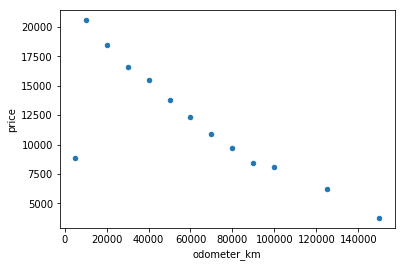

In [40]:
%matplotlib inline

relation.plot(x = 'odometer_km', y = 'price', kind = 'scatter')

We can see the relation between odometer_km and price clearly, the more value in odometer_km will decrease the value of the car. But we see one data points that didn't follow the pattern, the 5000 value.

## Price Comparison Between Damaged and Non-Damaged Car

In [41]:
unrepaired_car = autos[autos['unrepaired_damage'] ==  'yes'][['name', 'price']]

repaired_car = autos[autos['unrepaired_damage'] == 'no'][['name','price']]

selected_car = set(unrepaired_car['name']).intersection(set(repaired_car['name']))
listed_car = list(selected_car)
listed_car

['Volkswagen_Golf_3',
 'Mazda_Premacy_1.9_Comfort',
 'Mercedes_Benz_V_220_CDI_Ambiente',
 'Audi_A6_Avant_4.2_quattro',
 'VW_New_Beetle',
 'Opel_vectra_b',
 'Peugeot_807_HDi_130_Tendance',
 'Fiat_Punto',
 'Volkswagen_Multivan_T4_70B_MC2',
 'Ford_Mondeo_2.0_Turnier_TDCi_Trend',
 'Opel_Astra_Cabrio_1.6i_Bertone_Edition',
 'Chevrolet_Kalos_1.2_SE',
 'Renault_Megane_1.6_Grandtour',
 'Opel_Astra_GTC_1.6',
 'Mazda_Premacy_TD_Exclusive',
 'VW_Polo_86c',
 'Suzuki_Swift_1.3_Comfort_dance',
 'Opel_Astra_1.6_Comfort',
 'MINI_Cooper',
 'Audi_A3_1.8',
 'Peugeot_206_cc',
 'Volkswagen_Polo',
 'Renault_Clio_1.2_16V_Expression',
 'Seat_Cordoba',
 'BMW_735i',
 'Volkswagen_Bora_1.6_Pacific',
 'Mercedes_Benz_E_240',
 'BMW_320_Ci',
 'Auto_zu_verkaufen',
 'Ford_Focus_1.8_TDCi',
 'Opel_Agila_1.2_16_V_Comfort',
 'Mercedes_Benz_CLK_Coupe_200_Elegance',
 'Opel_Astra_1.6_Caravan_Njoy',
 'Suzuki_Swift_1.3',
 'Mercedes_Benz_C_200_Elegance',
 'Opel_Zafira_A',
 'Opel_Meriva',
 'Peugeot_206_75_Bel_Air',
 'Audi_A3_1.8_

In [42]:
price_r = []
for c in listed_car:
    selected = repaired_car[repaired_car['name'] == c]['price']
    rcmp = selected.agg(np.mean)
    price_r.append(rcmp)

price_u = []
for c in listed_car:
    selected = unrepaired_car[unrepaired_car['name'] == c]['price']
    ucmp = selected.agg(np.mean)
    price_u.append(ucmp)
    
price_r = np.array(price_r)
price_u = np.array(price_u)

price = price_r - price_u
price = price.mean()
price
    

1638.0318894206187

We can see that the average differences price between repaired car and unrepaired car is 1638 USD. which means the repaired car in average, 1638 USD more expensive than unrepaired car.